# Plot figures

In [1]:
%load_ext autoreload
%autoreload 2

from plot_utils import *

In [2]:
setups = ['CC_wrn', 'CC_ResNet18', 'CC_ResNet10', 'CC_conv4', 'protonet_wrn', 'matchingnet_wrn']
setup_to_name = {
    'CC_wrn':'CC WRN',
    'CC_conv4':'CC Conv4',
    'CC_ResNet10':'CC ResNet10',
    'CC_ResNet18':'CC ResNet18',
    'protonet_wrn':'ProtoNet WRN',
    'matchingnet_wrn':'MatchingNet WRN',
}
feat_name = {'oracle':'Oracle', 'moco':'MoCo', 'randfeat':'Random Network', 'wordnet':'WordNet'}
bench_name = {
    'miniIN1k_nim100_seed0':'Random classes',
    'miniIN1k_nim100_seed0_farthest': 'Farthest classes',
    'miniIN1k_nim100_seed0_closest': 'Closest classes',
}

# Fig 7: Class diversity matters ?

In [45]:
# show_grid_and_results('submitit_runs/0_eccv/feat_var_min_max_similarity_random_30k_31k_35k/')
result_dir = 'submitit_runs/0_eccv/feat_var_min_max_similarity_random_30k_31k_35k/'
result_dir = 'submitit_runs/0_eccv/feat_var_min_max_similarity_random_30k_31k_35k_cub/'
# result_dir = 'submitit_runs/0_eccv/feat_var_min_max_similarity_random_30k_31k_35k_flower/'
# result_dir = 'submitit_runs/0_eccv/feat_var_min_max_similarity_random_30k_31k_35k_miniIN1k_least_diverse/'
result_dir = 'submitit_runs/0_eccv/class_selection_exp_min_max_similarity_miniIN1k/'
result_dir = 'submitit_runs/0_eccv/class_selection_exp_min_max_similarity_cub_miniIN_flower/'
result_dir = 'submitit_runs/0_eccv/class_selection_exp_validation_acc_cub_miniIN_flower/'
# result_dir = 'submitit_runs/0_eccv/class_selection_exp_validation_acc_miniIN1k/'
# result_dir = 'submitit_runs/0_eccv/class_selection_exp_diversity_cub_miniIN_moco/'
# result_dir = 'submitit_runs/0_eccv/class_selection_exp_diversity_miniIN1k_moco/'

results, grid, args = get_result_dict(result_dir)
grid, len(results)

({'seed': [0, 1, 3, 2, 4],
  'benchmark': ['cub', 'miniIN'],
  'rank': [2, 0, 5, 3, 6, 8, 1, 4, 7, 9]},
 100)

In [ ]:
r = 1.15
fig, ax = plt.subplots(figsize=(6*r, 4*r))

markers = ['','x','o',"v",'.','d']
linestyles = ['solid','dashed','dotted',]
nc_lines = []
ranks = sorted(grid['rank'])

vals = []
# for i, benchmark in enumerate(sorted(grid['benchmark'], key=lambda x:int(x.split('_')[-1]))):
for i, benchmark in enumerate(['miniIN','cub']):
#     if i > 7:
#         continue
    print(benchmark)
    take = {'benchmark':benchmark}
    r, g, a = get_result_dict(result_dir, take=take)
    if len(r) == 0:
        continue
    xaxis, top1ms, top1stds, top5ms, top5stds = get_kshot_mean_std('rank', g, r)
    vals.append(top5ms)
    xaxis = [int(1+x) for x in xaxis]
#     linestyle = 'dashed'# if i <= 7 else 'dotted'
    (lines, caps5, _) = ax.errorbar(xaxis, top5ms, top5stds, linestyle='solid', marker='', markersize=6, capsize=2, 
                                elinewidth=0, color=colors[i%len(colors)], linewidth=2, label=benchmark.split('_')[-1])
#     lines, = ax.plot(xaxis, top5ms, linestyle='dashed', color=colors[i])
    
    nc_lines.append(lines)

expname = 'validation accuracy' if 'val_acc' in benchmark or 'exp_validation' in result_dir else 'class diversity'
xaxis_labels = xaxis
ax.set_xticks(xaxis_labels)
ax.set_xticklabels(xaxis_labels)
ax.set_xlabel(f'Increasing {expname} deciles - miniIN6k train classes')# #
ax.set_ylabel(f'5-shot, 5-way accuracy')


In [ ]:
legend1 = Legend(ax,nc_lines[:2], ['miniIN','CUB'], loc=6, title='Test classes')
ax.add_artist(legend1)
fig

In [29]:
fig.savefig(f'submitit_runs/figures/validation_accuracy_miniIN_CUB.pdf', format='pdf', bbox_inches="tight")

In [ ]:
x = np.stack(vals)
av_line,  = ax.plot(xaxis, x.mean(0), linestyle='solid', marker='', color='black', linewidth=2)
fig

In [21]:
legend1 = Legend(ax,nc_lines, [str(x) for x in range(1,11)], ncol=5, loc=8, title=f'Test classes - miniIN1k {expname} deciles')#diversity+[r'$9^*$',r'$10^*$']#validation accuracy
ax.add_artist(legend1)

In [22]:
legend2 = Legend(ax, [av_line], ['Average over deciles'], ncol=1, loc=2)#+[r'$9^*$',r'$10^*$']over 8 first
ax.add_artist(legend2)

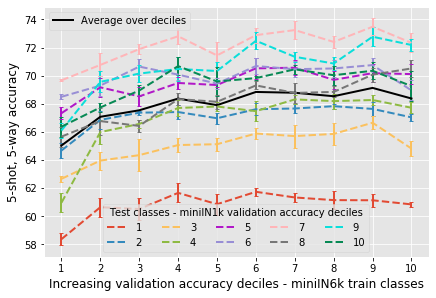

In [23]:
fig

In [121]:
legend1.remove()

In [24]:
fig.savefig(f'submitit_runs/figures/validation_accuracy_miniIN1k_deciles.pdf', format='pdf', bbox_inches="tight")#class_diversity

In [40]:
expname

'validation accuracy'

In [47]:

for bb, benchmark in enumerate(['miniIN','cub']):
    if expname == 'validation accuracy':
        result_dir = 'submitit_runs/0_eccv/class_selection_exp_validation_cub_miniIN_random/'
        take = {'benchmark':benchmark}
    else:
        if benchmark == 'cub':
            result_dir = 'submitit_runs/0_eccv/feat_var_min_max_similarity_random_30k_31k_35k_cub/'
        elif benchmark == 'miniIN':
            result_dir = 'submitit_runs/0_eccv/feat_var_min_max_similarity_random_30k_31k_35k/'
        take = {'selection':'random'}
    results, grid, args = get_result_dict(result_dir)
    

    r, g, a = get_result_dict(result_dir, take=take)
    xaxis, top1ms, top1stds, top5ms, top5stds = get_kshot_mean_std('rank', g, r)
    xaxis = [int(1+x) for x in xaxis]
    (lines, caps5, _) = ax.errorbar(xaxis, top5ms, top5stds, linestyle='dotted', marker='', markersize=6, capsize=2, 
                                elinewidth=1, color=colors[bb], linewidth=2, label=benchmark.split('_')[-1])
    nc_lines.append(lines)


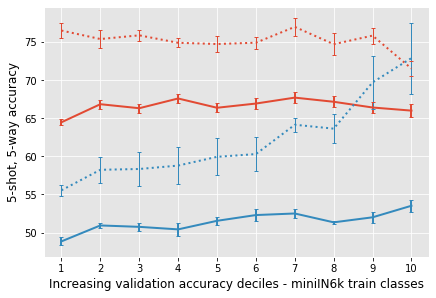

In [48]:
fig

In [49]:
legend1 = Legend(ax,nc_lines[:2], ['miniIN','cub'], loc=6, title='Test classes')
ax.add_artist(legend1)  
legend2 = Legend(ax, nc_lines[::2], ['with distance filtering', 'w/o distance filtering'], loc=7, title='Class sampling')
ax.add_artist(legend2)
for h in legend2.legendHandles:
    h.set_color('black')

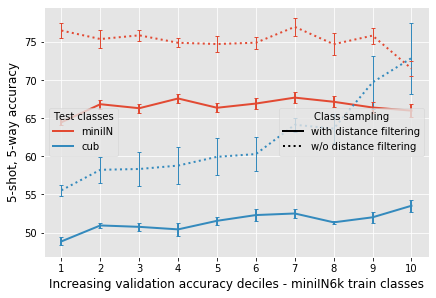

In [50]:
fig

In [52]:
x = '_'.join(expname.split())
fig.savefig(f'submitit_runs/figures/{x}_miniIN_cub_distance_selection.pdf', format='pdf', bbox_inches="tight")

## Figure trade-off on miniIN

In [6]:
benchmark = 'miniIN'
if benchmark == 'miniIN':
    result_dir = 'submitit_runs/2_eccv/trade_off_miniIN/' # 70000,71000,75000, 80000 iterations
elif benchmark == 'cub':
    result_dir = 'submitit_runs/2_eccv/trade_off_cub/' # CL: 400 epochs * 100

results, grid, args = get_result_dict(result_dir)
grid

{'seed': [0, 1, 2],
 'nc': [48, 64, 384, 512, 128, 256, 640, 1280, 3840],
 'setup': ['CC_conv4',
  'protonet_wrn',
  'CC_ResNet18',
  'CC_ResNet10',
  'matchingnet_wrn',
  'CC_wrn']}

27
27
26
27
27
27


/private/home/sbaio/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/private/home/sbaio/.local/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/private/home/sbaio/.local/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/private/home/sbaio/.local/lib/python3.6/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/private/home/sbaio/.local/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


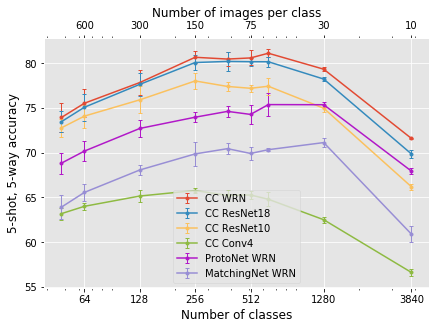

In [7]:
fig, ax = plt.subplots(figsize=(6.9, 4.6))

N = 38400
maxval = -1
for i, setup in enumerate(setups):
    take = {'setup':setup}
    results, grid, args = get_result_dict(result_dir, take=take)
    if not len(results):
        continue
    print(len(results))
    xaxis, top1ms, top1stds, top5ms, top5stds = get_kshot_mean_std('nc', grid, results)
    maxval = max(max(top5ms),maxval)
#     (_, caps1, _) = ax.errorbar(xaxis, top1ms, top1stds, linestyle='--', marker='.', label=f'', capsize=2, 
#                                 elinewidth=1, color=colors[i])
    (_, caps5, _) = ax.errorbar(xaxis, top5ms, top5stds, linestyle='-', marker='.', label=f'{setup_to_name[setup]}', capsize=2, 
                                elinewidth=1, color=colors[i])
    
ax.set_xscale('log')
ax.xaxis.set_major_formatter(NullFormatter())
ax.xaxis.set_minor_formatter(NullFormatter())
xaxis_labels = [64,128,256,512,1280,3840]

ax.set_xticks(xaxis_labels)
ax.set_xticklabels(xaxis_labels)
ax.set_xlabel(f'Number of classes')
ax.set_ylabel('5-shot, 5-way accuracy')

ax2 = ax.twiny()
ax2.xaxis.set_major_formatter(NullFormatter())
ax2.xaxis.set_minor_formatter(NullFormatter())
ax2.set_xscale('log')

ax2.set_xlabel(f'Number of images per class')
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(ax.get_xticks())
ax2.set_xticklabels([int(N/x) for x in xaxis_labels])
ax2.grid(False)
ax.legend()

In [8]:
fig.savefig(f'submitit_runs/2_eccv/figures/trade_off/trade_off_{benchmark}.pdf', format='pdf', bbox_inches="tight")

## Split group using different features (oracle, moco, randfeat...)

In [10]:
result_dir = 'submitit_runs/2_eccv/split_group_class_ratio_feat/'
results, grid, args = get_result_dict(result_dir)
grid

{'seed': [1005, 1007, 1006],
 'feat': ['oracle', 'moco', 'randfeat'],
 'benchmark': ['miniIN', 'cub'],
 'class_ratio': [0.125, 0.25, 0.5, 1, 2, 8, 4],
 'nc': [96, 384, 1536]}

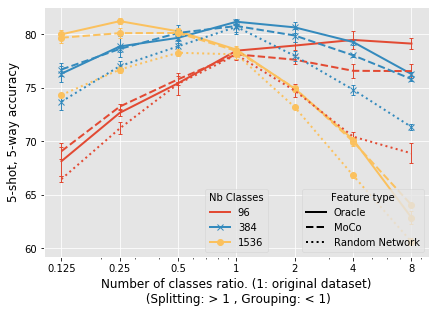

In [11]:
fig, ax = plt.subplots(figsize=(6.9, 4.6))
benchmark = 'miniIN'
markers = ['','x','o',"v",'.','d']
linestyles = ['solid','dashed','dotted',]
nc_lines = []

feats = grid['feat']
for i, feat in enumerate(feats):
    for j, nc in enumerate(grid['nc']):
        take = {'nc': nc, 'feat':feat, 'benchmark':benchmark}
        r, g, a = get_result_dict(result_dir, take=take)
        if len(r) == 0:
            continue
        xaxis, top1ms, top1stds, top5ms, top5stds = get_kshot_mean_std('class_ratio', g, r)
        (lines, caps5, _) = ax.errorbar(xaxis, top5ms, top5stds, linestyle=linestyles[i], marker=markers[j], markersize=6, capsize=2, 
                                    elinewidth=1, color=colors[j%len(colors)], linewidth=2)#
        nc_lines.append(lines)

ax.set_xscale('log')
ax.xaxis.set_major_formatter(NullFormatter())
ax.xaxis.set_minor_formatter(NullFormatter())
xaxis_labels = grid['class_ratio']
ax.set_xticks(xaxis_labels)
ax.set_xticklabels(xaxis_labels)
ax.set_xlabel(f'Number of classes ratio. (1: original dataset)\n (Splitting: > 1 , Grouping: < 1)')

ax.set_ylabel(f'5-shot, 5-way accuracy')

legend1 = Legend(ax,nc_lines[::len(grid['nc'])], [feat_name[x] for x in feats], loc=4, title='Feature type')
ax.add_artist(legend1)
for h in legend1.legendHandles:
    h.set_color('black')
    
legend2 = Legend(ax, nc_lines[:3], [str(x) for x in grid['nc']], loc=8, title='Nb Classes')
ax.add_artist(legend2)


In [12]:
fig.savefig(f'submitit_runs/2_eccv/figures/split_group/{benchmark}_CC_features.pdf', format='pdf', bbox_inches="tight")

## Split group using different setups (CC_wrn, protonet_wrn, CC_ResNet10 ...)

In [9]:
result_dir = 'submitit_runs/2_eccv/split_group_class_ratio_miniIN/'
# result_dir = 'submitit_runs/2_eccv/split_group_class_ratio_miniIN_64x800/'
# result_dir = 'submitit_runs/2_eccv/split_group_class_ratio_cub/'

results, grid, args = get_result_dict(result_dir)
grid

{'seed': [1006, 1005, 1007],
 'class_ratio': [0.125, 0.25, 0.5, 1, 2, 4, 8],
 'nc': [96, 384, 1536, 6000, 3072],
 'setup': ['CC_wrn',
  'CC_ResNet18',
  'CC_conv4',
  'protonet_wrn',
  'CC_ResNet10',
  'matchingnet_wrn']}

CC_wrn 96
CC_wrn 384
CC_wrn 1536
protonet_wrn 96


/private/home/sbaio/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/private/home/sbaio/.local/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/private/home/sbaio/.local/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/private/home/sbaio/.local/lib/python3.6/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/private/home/sbaio/.local/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


protonet_wrn 384
protonet_wrn 1536
matchingnet_wrn 96
matchingnet_wrn 384
matchingnet_wrn 1536


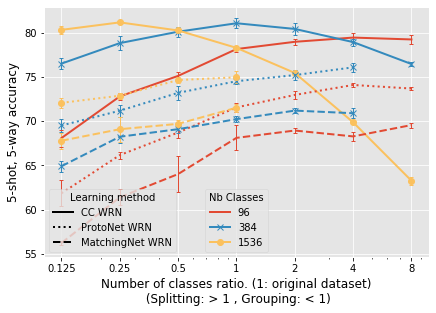

In [13]:
fig, ax = plt.subplots(figsize=(6.9, 4.6))
markers = ['','x','o',"v",'.','d']
linestyles = ['solid','dotted','dashed','dashdot']
nc_lines = []
ss = ['CC_wrn', 'protonet_wrn', 'matchingnet_wrn']#grid['setup']#
# ss = ['CC_wrn','CC_ResNet18','CC_ResNet10','CC_conv4']
ncs = [96,384,1536]
for i, setup in enumerate(ss):
    for j, nc in enumerate(ncs):
        take = {'nc': nc, 'setup':setup}
        print(setup, nc)
        r, g, a = get_result_dict(result_dir, take=take)
        if len(r) == 0:
            continue
        xaxis, top1ms, top1stds, top5ms, top5stds = get_kshot_mean_std('class_ratio', g, r)
        (lines, caps5, _) = ax.errorbar(xaxis, top5ms, top5stds, linestyle=linestyles[i], marker=markers[j], markersize=6, capsize=2, 
                                    elinewidth=1, color=colors[j%len(colors)], linewidth=2)#, label=f'{setup_to_name[setup]} {nc}'
        nc_lines.append(lines)

ax.set_xscale('log')
ax.xaxis.set_major_formatter(NullFormatter())
ax.xaxis.set_minor_formatter(NullFormatter())
xaxis_labels = grid['class_ratio']
ax.set_xticks(xaxis_labels)
ax.set_xticklabels(xaxis_labels)
ax.set_xlabel(f'Number of classes ratio. (1: original dataset)\n (Splitting: > 1 , Grouping: < 1)')

ax.set_ylabel(f'5-shot, 5-way accuracy')

legend1 = Legend(ax,nc_lines[::len(ncs)], [setup_to_name[x] for x in ss], loc=3, title='Learning method')
ax.add_artist(legend1)
for h in legend1.legendHandles:
    h.set_color('black')
    
legend2 = Legend(ax, nc_lines[:len(ncs)], [str(x) for x in ncs], loc=8, title='Nb Classes')
ax.add_artist(legend2)


In [14]:
# fig.savefig(f'submitit_runs/2_eccv/figures/split_group/miniIN_CC_archs.pdf', format='pdf', bbox_inches="tight")
fig.savefig(f'submitit_runs/2_eccv/figures/split_group/miniIN_meta_WRN.pdf', format='pdf', bbox_inches="tight")
# fig.savefig(f'submitit_runs/2_eccv/figures/split_group/cub_meta_WRN.pdf', format='pdf', bbox_inches="tight")

### Group many classes

In [4]:
result_dir = 'submitit_runs/2_eccv/group_classes_ratio_miniIN_wrn/'
results, grid, args = get_result_dict(result_dir)
grid

{'seed': [1005, 1006, 1007],
 'class_ratio': [0.125, 0.25, 0.5, 1],
 'nc': [1536, 6000, 3072]}

In [ ]:
fig, ax = plt.subplots(figsize=(6.9, 4.6))
markers = ['x','o',"v",'.']
linestyles = ['solid','dotted','dashed',]
nc_lines = []
ss = ['CC_wrn']#grid['setup']#['CC_wrn', 'protonet_wrn', 'matchingnet_wrn']

for i, setup in enumerate(ss):#setups:#setups:#'CC_conv4','protonet_wrn'
    for j, nc in enumerate(grid['nc']):
        take = {'nc': nc, 'setup':setup}
        r, g, a = get_result_dict(result_dir, take=take)
        if len(r) == 0:
            continue
        xaxis, top1ms, top1stds, top5ms, top5stds = get_kshot_mean_std('class_ratio', g, r)
        (lines, caps5, _) = ax.errorbar(xaxis, top5ms, top5stds, linestyle=linestyles[i], marker=markers[i], markersize=6, label=f'{setup_to_name[setup]} {nc}', capsize=2, 
                                    elinewidth=1, color=colors[j%len(colors)])
        nc_lines.append(lines)

ax.set_xscale('log')
ax.xaxis.set_major_formatter(NullFormatter())
ax.xaxis.set_minor_formatter(NullFormatter())
xaxis_labels = grid['class_ratio']
ax.set_xticks(xaxis_labels)
ax.set_xticklabels(xaxis_labels)
ax.set_xlabel(f'Number of classes ratio for grouping. (1: original dataset)')

ax.set_ylabel(f'5-shot, 5-way accuracy')

legend1 = Legend(ax,nc_lines[::3], [setup_to_name[x] for x in ss], loc=3, title='Learning method')
ax.add_artist(legend1)
legend2 = Legend(ax, nc_lines[:3], [str(x) for x in grid['nc']], loc=8, title='Nb Classes')
ax.add_artist(legend2)

# Fig 10 

In [13]:
result_dir = 'submitit_runs/2_eccv/split_group_kmeans_agglo_hpbc2/'# splitting
results, grid, args = get_result_dict(result_dir)
grid

{'seed': [1006, 1007, 1005],
 'cluster_type': ['kmeans', 'h_median_dich'],
 'class_ratio': [8, 2, 4, 1],
 'nc': [384, 1536, 96]}

h_median_dich 96
h_median_dich 384
h_median_dich 1536
kmeans 96
kmeans 384
kmeans 1536


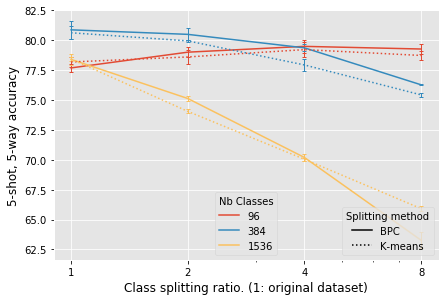

In [16]:
fig, ax = plt.subplots(figsize=(6.9, 4.6))
markers = ['x','o',"v",'.']
linestyles = ['solid','dotted','dashed',]
nc_lines = []
d = {'h_median_dich': 'BPC', 'kmeans':'K-means'}
tt = ['h_median_dich', 'kmeans']
ncs = [96, 384, 1536]#grid['nc']
for i, ttype in enumerate(tt):
    for j, nc in enumerate(ncs):
        print(ttype, nc)
        take = {'nc': nc, 'cluster_type':ttype}
        r, g, a = get_result_dict(result_dir, take=take)
        if len(r) == 0:
            continue
        xaxis, top1ms, top1stds, top5ms, top5stds = get_kshot_mean_std('class_ratio', g, r)
        (lines, caps5, _) = ax.errorbar(xaxis, top5ms, top5stds, linestyle=linestyles[i], marker='', 
                                        markersize=6, label=f'{ttype} {nc}', capsize=2, 
                                    elinewidth=1, color=colors[j%len(colors)])
        nc_lines.append(lines)

ax.set_xscale('log')
ax.xaxis.set_major_formatter(NullFormatter())
ax.xaxis.set_minor_formatter(NullFormatter())
xaxis_labels = grid['class_ratio']
ax.set_xticks(xaxis_labels)
ax.set_xticklabels(xaxis_labels)
ax.set_xlabel(f'Class splitting ratio. (1: original dataset)')

ax.set_ylabel(f'5-shot, 5-way accuracy')
legend1 = Legend(ax,nc_lines[::3], [d[x] for x in tt], loc=4, title='Splitting method')
ax.add_artist(legend1)
legend2 = Legend(ax, nc_lines[:3], [str(x) for x in ncs], loc=8, title='Nb Classes')
ax.add_artist(legend2)

for h in legend1.legendHandles:
    h.set_color('black')

In [17]:
fig.savefig(f'submitit_runs/2_eccv/figures/split_group/splitting_kmeans_vs_mediandich.pdf', format='pdf', bbox_inches="tight")


### Grouping

In [18]:
result_dir = 'submitit_runs/2_eccv/split_group_kmeans_agglo_hpbc/'# grouping
results, grid, args = get_result_dict(result_dir)
grid

{'seed': [1006, 1005, 1007],
 'class_ratio': [0.125, 0.25, 0.5, 1],
 'group_type': ['kmeans', 'agglo'],
 'nc': [96, 384, 1536]}

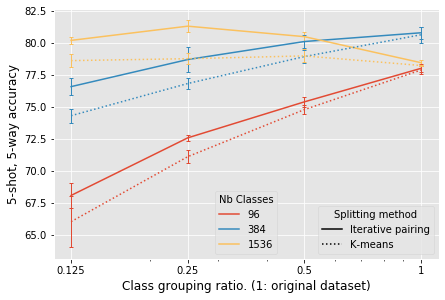

In [19]:
fig, ax = plt.subplots(figsize=(6.9, 4.6))
markers = ['x','o',"v",'.']
linestyles = ['solid','dotted','dashed',]
nc_lines = []
d = {'agglo':'Iterative pairing', 'kmeans':'K-means'}
tt = ['agglo', 'kmeans']
ncs = grid['nc']
for i, ttype in enumerate(tt):
    for j, nc in enumerate(ncs):
        take = {'nc': nc, 'group_type':ttype}
        r, g, a = get_result_dict(result_dir, take=take)
        if len(r) == 0:
            continue
        xaxis, top1ms, top1stds, top5ms, top5stds = get_kshot_mean_std('class_ratio', g, r)
        (lines, caps5, _) = ax.errorbar(xaxis, top5ms, top5stds, linestyle=linestyles[i], marker='', 
                                        markersize=6, label=f'{ttype} {nc}', capsize=2, 
                                    elinewidth=1, color=colors[j%len(colors)])
        nc_lines.append(lines)

ax.set_xscale('log')
ax.xaxis.set_major_formatter(NullFormatter())
ax.xaxis.set_minor_formatter(NullFormatter())
xaxis_labels = grid['class_ratio']
ax.set_xticks(xaxis_labels)
ax.set_xticklabels(xaxis_labels)
ax.set_xlabel(f'Class grouping ratio. (1: original dataset)')

ax.set_ylabel(f'5-shot, 5-way accuracy')

legend1 = Legend(ax,nc_lines[::3], [d[x] for x in tt], loc=4, title='Splitting method')
ax.add_artist(legend1)
legend2 = Legend(ax, nc_lines[:3], [str(x) for x in ncs], loc=8, title='Nb Classes')
ax.add_artist(legend2)

for h in legend1.legendHandles:
    h.set_color('black')

In [20]:
fig.savefig(f'submitit_runs/2_eccv/figures/split_group/grouping_kmeans_vs_agglo.pdf', format='pdf', bbox_inches="tight")


## Figure closest classes

In [6]:
# result_dir = 'submitit_runs/2_eccv/closest_farthest_random_miniIN/'
# result_dir = 'submitit_runs/2_eccv/closest_farthest_random_miniIN_CL/'
# result_dir = 'submitit_runs/2_eccv/closest_farthest_random_cub_CL_longer/'
# # result_dir = 'submitit_runs/2_eccv/closest_farthest_random_miniIN_archs2/'
# result_dir = 'submitit_runs/2_eccv/closest_farthest_random_miniIN_archs_2500/'
# results, grid, args = get_result_dict(result_dir)
# grid

In [3]:
show_grid_and_results()

{'setup': ['CC_wrn', 'CC_ResNet10', 'CC_ResNet18'], 'seed': [0, 1, 2], 'rankmode': ['random', 'closest']}
03  -  {'setup': 'CC_wrn', 'rankmode': 'random'} : 5-shot:94.40±0.03
03  -  {'setup': 'CC_wrn', 'rankmode': 'closest'} : 5-shot:96.55±0.06
03  -  {'setup': 'CC_ResNet10', 'rankmode': 'random'} : 5-shot:90.50±0.13
03  -  {'setup': 'CC_ResNet10', 'rankmode': 'closest'} : 5-shot:92.89±0.03
02  -  {'setup': 'CC_ResNet18', 'rankmode': 'random'} : 5-shot:93.44±0.06
01  -  {'setup': 'CC_ResNet18', 'rankmode': 'closest'} : 5-shot:95.61±0.00


{'setup': ['CC_wrn', 'CC_ResNet10', 'CC_ResNet18'],
 'seed': [0, 1, 2],
 'rankmode': ['random', 'closest']}

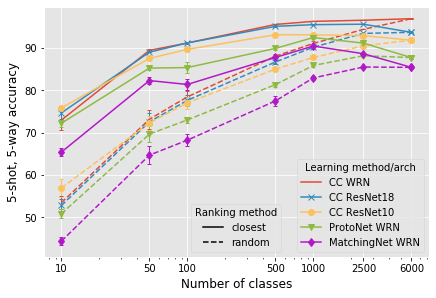

In [4]:
xaxis = [10,50,100,500,1000,2500,6000]
d = {
    'CC_wrn':{
        'random':[[53.41,73.14,78.42,88.05,91.05,94.40,96.91], [1.56,2.29,1.32,0.53,0.49,0.03,0.14]],
        'closest':[[72.93,89.42,91.17,95.55,96.28,96.55,96.91], [2.29,0.32,0.22,0.07,0.01,0.06,0.14]],
    },
    'CC_ResNet18':{
        'random':[[52.76,72.53,77.60,86.67,90.17,93.44,93.69], [1.51,2.11,1.24,0.52,0.39,0.06,0.05]],
        'closest':[[74.63,88.99,91.18,95.10,95.50,95.61,93.69], [1.41,0.03,0.19,0.10,0.10,0.06,0.05]],
    },
    'CC_ResNet10':{
        'random':[[56.91,72.28,77.03,84.98,87.74,90.50,91.84], [2.14,1.75,1.43,0.38,0.29,0.13,0.06]],
        'closest':[[75.82,87.52,89.66,93.12,93.11,92.89,91.84], [0.17,0.15,0.55,0.10,0.12,0.03,0.06]],
    },
    'protonet_wrn':{
        'random':[[50.80,69.63,72.99,81.33,85.85, 88.16, 87.72], [1.02,1.97,0.73,0.48,0.42,0.25,0.42]],
        'closest':[[72.19,85.24,85.36,89.89,92.46, 91.14, 87.72], [0.85,0.44,1.29,0.35,0.30,0.21, 0.42]],
    },
    'matchingnet_wrn':{
        'random':[[44.32,64.66,68.20,77.47,82.91,85.49,85.41], [1.00,2.06,1.37,1.11,0.52,0.01,0.25]],
        'closest':[[65.37,82.29,81.37,87.75,90.45,88.63,85.41], [0.90,0.88,1.21,0.53,0.17,0.13,0.25]],
    }
}

# run 2500 - 
fig, ax = plt.subplots(figsize=(6.9, 4.6))
lines = []

markers = ['','x','o',"v",'d']
linestyles = ['solid', 'dashed',]

rr = ['closest', 'random']
for i, setup in enumerate(d.keys()):
    for j,rankmode in enumerate(rr):
        y = d[setup][rankmode][0]
        err = d[setup][rankmode][1]
        
        (l, caps5, _) = ax.errorbar(xaxis, y, err, linestyle=linestyles[j], marker=markers[i], markersize=6, capsize=2, 
                                    elinewidth=1, color=colors[i%len(colors)])
        lines.append(l)

ax.set_xscale('log')
ax.xaxis.set_major_formatter(NullFormatter())
ax.xaxis.set_minor_formatter(NullFormatter())
xaxis_labels = xaxis
ax.set_xticks(xaxis_labels)
ax.set_xticklabels(xaxis_labels)
ax.set_xlabel(f'Number of classes')

ax.set_ylabel(f'5-shot, 5-way accuracy')

legend1 = Legend(ax, lines[::len(rr)], [setup_to_name[x] for x in d.keys()], loc=4, title='Learning method/arch')
ax.add_artist(legend1)
legend2 = Legend(ax, lines[:len(rr)], [str(x) for x in rr], loc=8, title='Ranking method')
ax.add_artist(legend2)
for h in legend2.legendHandles:
    h.set_color('black')

In [5]:
fig.savefig(f'submitit_runs/2_eccv/figures/closest_random/miniIN_oracle_setups.pdf', format='pdf', bbox_inches="tight")


## Closest farthest classes - different features

In [7]:
result_dir = 'submitit_runs/2_eccv/closest_farthest_random_cub_feat/'
# result_dir = 'submitit_runs/2_eccv/closest_farthest_random_cub_feat2/'

results, grid, args = get_result_dict(result_dir)
grid

{'seed': [0, 1, 2],
 'feat': ['oracle', 'moco', 'wordnet'],
 'ngpus': [2, 1, 8],
 'steps': [[52710, 105420, 158130],
  [42180, 84360, 126540],
  [32940, 65880, 98820],
  [26340, 52680, 79020],
  [21090, 42180, 63270],
  [15000, 17500, 20000]],
 'bSz': [256, 64],
 'n_workers': [16, 8, 20],
 'rankmode': ['random', 'farthest', 'closest'],
 'nc': [1000, 100, 2500, 500, 50, 10]}

oracle closest
oracle farthest
moco closest
closest
[10, 50, 100, 500, 1000, 2500, 6000]
[60.430935, 75.52334, 81.54916, 87.07969, 88.76241, 89.22422, 90.89]
[0.60468423, 0.47322854, 0.4491985, 0.44000116, 0.21459617, 0.31794322, 0.1]
moco farthest
farthest
[10, 50, 100, 500, 1000, 2500, 6000]
[39.58498, 45.300312, 48.555866, 54.55592, 59.71405, 66.33778, 90.89]
[0.21693537, 0.40365085, 0.24361739, 0.38952824, 0.4590573, 0.30531886, 0.1]
wordnet closest
wordnet farthest
random


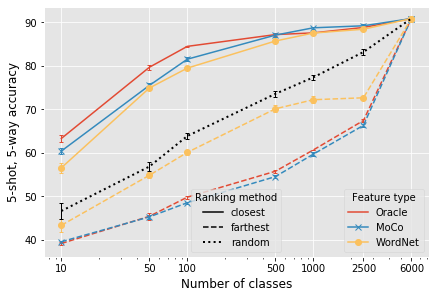

In [10]:
fig, ax = plt.subplots(figsize=(6.9, 4.6))
lines = []
i = 0; j = 0

markers = ['','x','o',"v",'d']
linestyles = ['solid','dashed','dotted',]
feats = ['oracle', 'moco','wordnet'] #grid['feat']

rr = ['closest', 'farthest']#
for _, feat in enumerate(feats):
    for _, rankmode in enumerate(rr):
        print(feat, rankmode)
        take = {'rankmode': rankmode, 'feat':feat}
        r, g, a = get_result_dict(result_dir, take=take)
        if len(r) == 0:
            continue
        xaxis, top1ms, top1stds, top5ms, top5stds = get_kshot_mean_std('nc', g, r)
        assert 6000 not in xaxis
        xaxis.append(6000.0); top5ms.append(90.89); top5stds.append(0.10)
        xaxis = [int(x) for x in xaxis]
        if feat == 'moco':
            print(rankmode)
            print(xaxis)
            print(top5ms)
            print(top5stds)
        (lines5, caps5, _) = ax.errorbar(xaxis, top5ms, top5stds, linestyle=linestyles[j], marker=markers[i], markersize=6, capsize=2, 
                                    elinewidth=1, color=colors[i%len(colors)])
        lines.append(lines5)
        j+=1; j = j%len(rr)
    i+=1
print('random')
r, g, a = get_result_dict(result_dir, take={'rankmode':'random'})
xaxis, top1ms, top1stds, top5ms, top5stds = get_kshot_mean_std('nc', g, r)
xaxis.append(6000.0); top5ms.append(90.89); top5stds.append(0.10)
xaxis = [int(x) for x in xaxis]
(lines5, caps5, _) = ax.errorbar(xaxis, top5ms, top5stds, linestyle='dotted', marker='', markersize=6, capsize=2, 
                            elinewidth=1, color='black', linewidth=2)#colors[i%len(colors)]
lines.append(lines5)

ax.set_xscale('log')
ax.xaxis.set_major_formatter(NullFormatter())
ax.xaxis.set_minor_formatter(NullFormatter())
xaxis_labels = xaxis
ax.set_xticks(xaxis_labels)
ax.set_xticklabels(xaxis_labels)
ax.set_xlabel(f'Number of classes')

ax.set_ylabel(f'5-shot, 5-way accuracy')

legend1 = Legend(ax, lines[::len(rr)], [feat_name[x] for x in feats], loc=4, title='Feature type')
ax.add_artist(legend1)

legend2 = Legend(ax, lines[:len(rr)]+[lines[-1]], [str(x) for x in rr+['random']], loc=8, title='Ranking method')
ax.add_artist(legend2)
for h in legend2.legendHandles:
    h.set_color('black')

In [ ]:
oracle closest
oracle farthest
moco closest
closest
[10, 50, 100, 500, 1000, 2500, 6000]
[60.430935, 75.52334, 81.54916, 87.07969, 88.76241, 89.22422, 90.89]
[0.60468423, 0.47322854, 0.4491985, 0.44000116, 0.21459617, 0.31794322, 0.1]
moco farthest
farthest
[10, 50, 100, 500, 1000, 2500, 6000]
[39.58498, 45.300312, 48.555866, 54.55592, 59.71405, 66.33778, 90.89]
[0.21693537, 0.40365085, 0.24361739, 0.38952824, 0.4590573, 0.30531886, 0.1]
wordnet closest
wordnet farthest
random

In [11]:
fig.savefig(f'submitit_runs/2_eccv/figures/closest_random/CUB_features_class_similarity.pdf', format='pdf', bbox_inches="tight")


## Feat var 

In [1]:
from plot_utils import *
benchmark = 'miniIN'
if benchmark == 'miniIN':
    result_dir = 'submitit_runs/2_eccv/feat_var_miniIN/'
elif benchmark == 'cub':
    result_dir = 'submitit_runs/2_eccv/feat_var_cub/'
else:
    raise ValueError(f'benchmark {benchmark} unknown')
result_dir = 'submitit_runs/2_eccv/feat_var_miniIN_cub_384_10seeds_30k_31k_35k/'
result_dir = 'submitit_runs/0_eccv/feat_var_miniIN_cub_flower_384_5seeds_30k_31k_35k/'

# show_grid_and_results(result_dir)
results, grid, args = get_result_dict(result_dir)
grid

{'seed': [0, 2, 3, 1, 4],
 'benchmark': ['miniIN', 'flower', 'cub'],
 'rank': [2, 0, 3, 7, 4, 1, 6, 9, 8, 5]}

miniIN 384
baseline
cub 384
baseline
flower 384
baseline


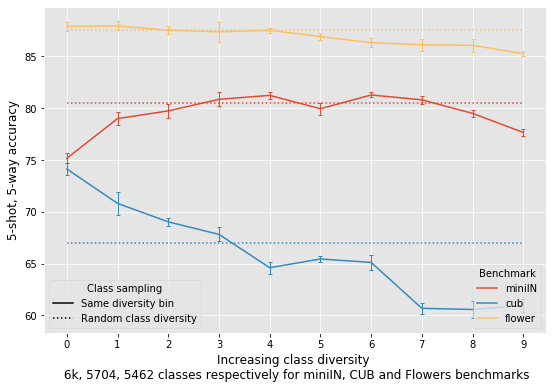

In [11]:
# Fig 7a-7b
r = 1.5
fig, ax = plt.subplots(figsize=(6*r,4*r))#
markers = ['x','o',"v",'.']
linestyles = ['solid','dotted','dashed', '-.']
nc_lines = []
ss = ['CC_wrn']
ncs = [384]#64, 
benchs = ['miniIN','cub','flower']#['cub']#benchmark
setup = 'CC_wrn'
for i, benchmark in enumerate(benchs):
    for j, nc in enumerate(ncs):
        print(benchmark, nc)
        take = {'benchmark': benchmark, 'nc':nc, 'setup':setup}
        r, g, a = get_result_dict(result_dir, take=take)
        
        if len(r) == 0:
            continue
        xaxis, top1ms, top1stds, top5ms, top5stds = get_kshot_mean_std('rank', g, r)
        (lines, caps5, _) = ax.errorbar(xaxis, top5ms, top5stds, linestyle='solid', marker='', markersize=6, capsize=2, 
                                    elinewidth=1, color=colors[i%len(colors)])#markers[i]
        nc_lines.append(lines)

        if benchmark == 'miniIN':
            if setup == 'CC_wrn':
                d = {64:75.53, 384:80.47}
            elif setup == 'protonet_wrn':
                d = {64:70.18, 384:74.62}
            elif setup == 'CC_ResNet10':
                d = {64:74.09, 384:77.41}
            elif setup == 'matchingnet_wrn':
                d = {64:65.56, 384:70.45}
            elif setup == 'CC_ResNet18':
                d = {64:75.09, 384:80.21}
            elif setup == 'CC_conv4':
                d = {64:64.01, 384:65.23}
            
            baseline = ax.plot(list(range(10)), [d[nc]]*10, c=colors[i%len(colors)], linestyle='dotted')[0]
            print('baseline')
            nc_lines.append(baseline)
        elif benchmark == 'cub':
            if setup == 'CC_wrn':
                d = {64:58.43, 384:66.95}
            elif setup == 'protonet_wrn':
                d = {64:51.76, 384:57.12}
            elif setup == 'CC_ResNet10':
                d = {64:56.97, 384:62.9}
            elif setup == 'matchingnet_wrn':
                d = {64:47.30, 384:50.64}
            elif setup == 'CC_ResNet18':
                d = {64:56.99, 384:65.05}
            elif setup == 'CC_conv4':
                d = {64:55.68, 384:58.80}
            baseline = ax.plot(list(range(10)), [d[nc]]*10, c=colors[i%len(colors)], linestyle='dotted')[0]
            nc_lines.append(baseline)
            print('baseline')
        elif benchmark == 'flower':
            if setup == 'CC_wrn':
                d = {384:87.5}
                baseline = ax.plot(list(range(10)), [d[nc]]*10, c=colors[i%len(colors)], linestyle='dotted')[0]
                nc_lines.append(baseline)
                print('baseline')
ax.xaxis.set_major_formatter(NullFormatter())
ax.xaxis.set_minor_formatter(NullFormatter())
xaxis_labels = sorted(grid['rank'])
ax.set_xticks(xaxis_labels)
ax.set_xticklabels(xaxis_labels)
ax.set_xlabel(f'Increasing class diversity \n 6k, 5704, 5462 classes respectively for miniIN, CUB and Flowers benchmarks')# ({nc} classes sampled per bin)

ax.set_ylabel(f'5-shot, 5-way accuracy')

legend1 = Legend(ax, nc_lines[0:2], ['Same diversity bin', 'Random class diversity'], loc=3, title='Class sampling')
ax.add_artist(legend1)
for h in legend1.legendHandles:
    h.set_color('black')
    
legend2 = Legend(ax, nc_lines[::2], benchs, loc=4, title='Benchmark')
ax.add_artist(legend2)

In [9]:
show_grid_and_results('submitit_runs/2_eccv/trade_off_384x100_flower_30k_31k_35k/')

{'seed': [0, 3, 4, 1, 2]}
05  -  {} : 5-shot:87.49±0.42


{'seed': [0, 3, 4, 1, 2]}

In [87]:
nc_lines

In [ ]:
# cross-evaluate the models
# trained using miniIN-val --> on CUB-test
# trained using CUB-val --> miniIN-test

In [32]:
fig.savefig(f'submitit_runs/2_eccv/figures/feat_var/class_selection_{benchmark}_384_64.pdf', format='pdf', bbox_inches="tight")


# Fig 7c-7d

CC_wrn 384
CC_ResNet18 384
CC_ResNet10 384
protonet_wrn 384


/private/home/sbaio/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/private/home/sbaio/.local/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/private/home/sbaio/.local/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/private/home/sbaio/.local/lib/python3.6/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/private/home/sbaio/.local/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


matchingnet_wrn 384


/private/home/sbaio/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/private/home/sbaio/.local/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/private/home/sbaio/.local/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/private/home/sbaio/.local/lib/python3.6/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/private/home/sbaio/.local/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


CC_conv4 384


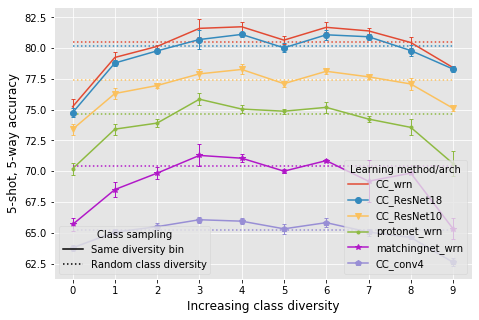

In [43]:
r = 1.25
fig, ax = plt.subplots(figsize=(6*r,4*r))#
markers = ['','o',"v",'.', '*','p']
nc_lines = []
ss = setups
ncs = [384]#64, 

for i, setup in enumerate(ss):
    for j, nc in enumerate(ncs):
        print(setup, nc)
        take = {'nc': nc, 'setup':setup}
        r, g, a = get_result_dict(result_dir, take=take)
        if len(r) == 0:
            continue
        xaxis, top1ms, top1stds, top5ms, top5stds = get_kshot_mean_std('rank', g, r)
        (lines, caps5, _) = ax.errorbar(xaxis, top5ms, top5stds, linestyle='solid', marker=markers[i], markersize=6, capsize=2, 
                                    elinewidth=1, color=colors[i%len(colors)])
        nc_lines.append(lines)

        if benchmark == 'miniIN':
            if setup == 'CC_wrn':
                d = {64:75.53, 384:80.47}
            elif setup == 'protonet_wrn':
                d = {64:70.18, 384:74.62}
            elif setup == 'CC_ResNet10':
                d = {64:74.09, 384:77.41}
            elif setup == 'matchingnet_wrn':
                d = {64:65.56, 384:70.45}
            elif setup == 'CC_ResNet18':
                d = {64:75.09, 384:80.21}
            elif setup == 'CC_conv4':
                d = {64:64.01, 384:65.23}
            baseline = ax.plot(list(range(10)), [d[nc]]*10, c=colors[i%len(colors)], linestyle='dotted')[0]
            nc_lines.append(baseline)
        elif benchmark == 'cub':
            if setup == 'CC_wrn':
                d = {64:58.43, 384:66.95}
            elif setup == 'protonet_wrn':
                d = {64:51.76, 384:57.12}
            elif setup == 'CC_ResNet10':
                d = {64:56.97, 384:62.9}
            elif setup == 'matchingnet_wrn':
                d = {64:47.30, 384:50.64}
            elif setup == 'CC_ResNet18':
                d = {64:56.99, 384:65.05}
            elif setup == 'CC_conv4':
                d = {64:55.68, 384:58.80}
            if d[nc]>0:
                baseline = ax.plot(list(range(10)), [d[nc]]*10, c=colors[i%len(colors)], linestyle='dotted')[0]
                nc_lines.append(baseline)
ax.xaxis.set_major_formatter(NullFormatter())
ax.xaxis.set_minor_formatter(NullFormatter())
xaxis_labels = sorted(grid['rank'])
ax.set_xticks(xaxis_labels)
ax.set_xticklabels(xaxis_labels)
ax.set_xlabel(f'Increasing class diversity')# ({nc} classes sampled per bin)

ax.set_ylabel(f'5-shot, 5-way accuracy')

legend1 = Legend(ax, nc_lines[0:2], ['Same diversity bin', 'Random class diversity'], loc=3, title='Class sampling')
ax.add_artist(legend1)
for h in legend1.legendHandles:
    h.set_color('black')
legend2 = Legend(ax, nc_lines[::2], [str(x) for x in ss], loc=4, title='Learning method/arch')
ax.add_artist(legend2)

In [44]:
fig.savefig(f'submitit_runs/2_eccv/figures/feat_var/class_selection_{benchmark}_archs.pdf', format='pdf', bbox_inches="tight")

## Run different evaluations of trained models ...

In [1]:
import submitit
import os
from argparse import Namespace
from exps import evaluate_ckpt
from glob import glob
import numpy as np
import torch

folder = 'submitit_runs/2_eccv/eval_ckpts2/'
executor = submitit.AutoExecutor(folder=os.path.join(folder, 'jobs/%j'))
executor.update_parameters(timeout_min=60, partition="dev", constraint="volta", comment='eccv deadline',tasks_per_node=1, gpus_per_node=1, mem_gb=60, 
                           cpus_per_task=10, nodes=1, signal_delay_s=120)

path  = 'submitit_runs/2_eccv/feat_var_miniIN1k_baseline_384x100_64x600_val_cub/'

jobs = []
for i,nc in enumerate([64, 384]):
#     for j,eval_ in enumerate(['miniIN1k_nim100_seed0_closest', 'miniIN1k_nim100_seed0_farthest', 'miniIN1k_nim100_seed0']):
    for j,eval_ in enumerate(['miniIN1k_most_diverse', 'miniIN1k_least_diverse', 'miniIN1k_nim100_seed0']):
        for k, seed in enumerate(range(5)):
            ckpt = os.path.join(glob(path+f'*_nc_{nc}_seed_{seed}')[0], 'best_checkpoint.pth')
            rundir = os.path.join(folder, f'%j_nc_{nc}_eval_{eval_}_seed_{seed}')
            opt = Namespace(ckpt_path=ckpt, test_json=eval_, logdir=rundir)
            
            # evaluate ckpt in different ways
            job = executor.submit(evaluate_ckpt, opt)
            jobs.append(job)
torch.save(jobs, folder+'jobs.pth')
len(jobs)

30